In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

# 1. Data Processing

In [2]:
# load data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

# class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

data_size = 28 # 28 x 28

# normalize datasets
x_train = x_train / 255.0
x_test = x_test / 255.0

# reshape the data size
x_train = x_train.reshape(-1, data_size, data_size, 1)
x_test = x_test.reshape(-1, data_size, data_size, 1)

# set validation data
x_val_train, x_val_test, y_val_train, y_val_test = train_test_split(x_train, y_train, test_size=0.30, random_state=42)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


# 2. Building the CNN Model

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [4]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(data_size, data_size, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(
    optimizer='adam', # opt: adam/sgd
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 3. Training & Evaluation

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix, ConfusionMatrixDisplay

In [7]:
histories =[]
history = model.fit(x_val_train, y_val_train, epochs=30, validation_data=(x_val_test, y_val_test))
histories.append(history)

Epoch 1/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6990 - loss: 0.8463 - val_accuracy: 0.8600 - val_loss: 0.3863
Epoch 2/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.8485 - loss: 0.4207 - val_accuracy: 0.8818 - val_loss: 0.3176
Epoch 3/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8680 - loss: 0.3649 - val_accuracy: 0.8890 - val_loss: 0.2944
Epoch 4/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8832 - loss: 0.3239 - val_accuracy: 0.8958 - val_loss: 0.2774
Epoch 5/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8924 - loss: 0.2910 - val_accuracy: 0.9002 - val_loss: 0.2695
Epoch 6/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8965 - loss: 0.2759 - val_accuracy: 0.9065 - val_loss: 0.2573
Epoch 7/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9054 - loss: 0.2534 - val_accuracy: 0.9083 - val_loss: 0.2478
Epoch 8/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9117 - loss: 0.2396

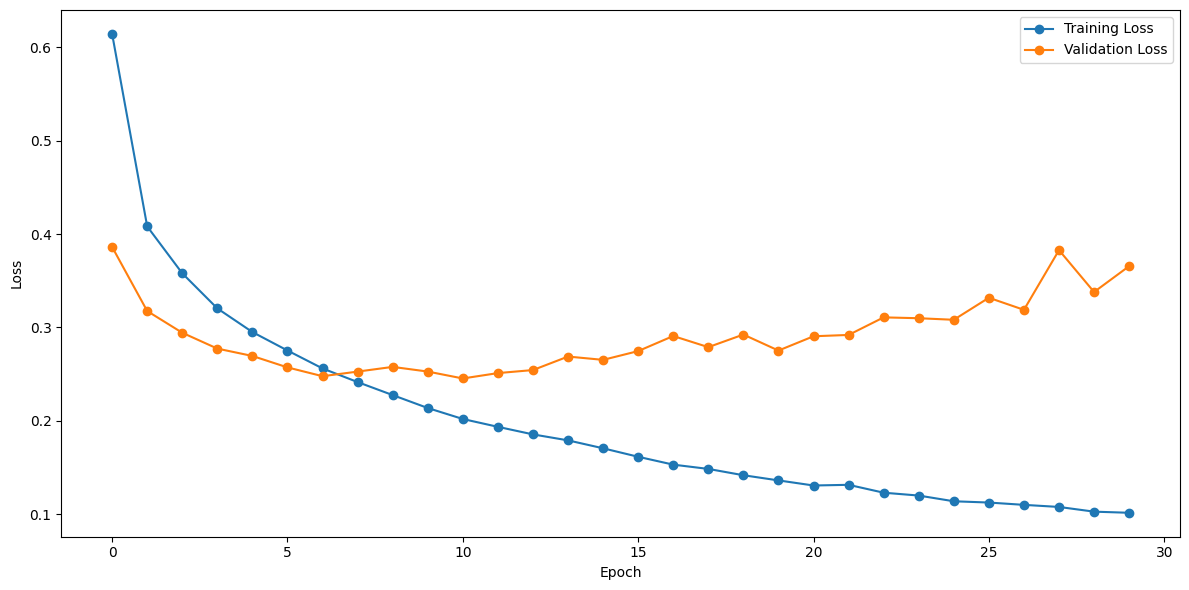

In [8]:
# plot loss curve
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], marker='o', label='Training Loss')
plt.plot(history.history['val_loss'], marker='o', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [9]:
test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy[1] * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9117 - loss: 0.4117
Test Accuracy: 91.21%


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


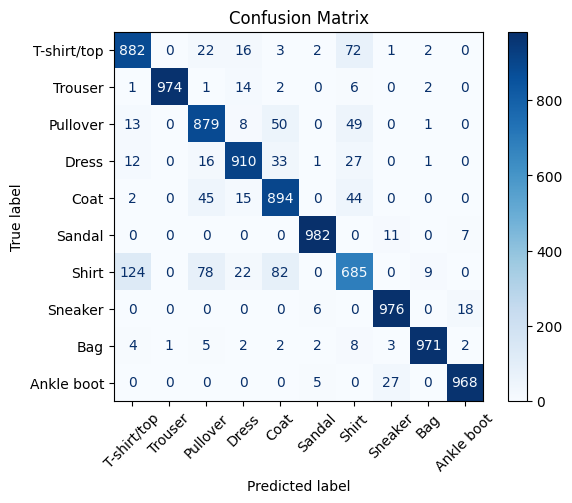

In [10]:
pred = model.predict(x_test)
pred_labels = np.argmax(pred, axis=1)  # Convert probabilities to class labels
# Use confusion_matrix instead of multilabel_confusion_matrix
cm = confusion_matrix(y_test, pred_labels)

ConfusionMatrixDisplay(cm, display_labels=class_names).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# 4.  Experimentation & Improvements

In [11]:
# define a function that executes: training, evaluation, plotting/drawing loss function and confusion matrix

def execute_model(model):
    # history
    history = model.fit(x_val_train, y_val_train, epochs=30, validation_data=(x_val_test, y_val_test))
    histories.append(history)

    # plot loss curve
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], marker='o', label='Training Loss')
    plt.plot(history.history['val_loss'], marker='o', label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Prediction
    pred = model.predict(x_test)

    # Convert probabilities to class labels
    pred_labels = np.argmax(pred, axis=1)

    # Use confusion_matrix instead of multilabel_confusion_matrix
    cm = confusion_matrix(y_test, pred_labels)

    # Show confusion matrix
    ConfusionMatrixDisplay(cm, display_labels=class_names).plot(cmap='Blues')
    plt.title(f'Confusion Matrix: {model.name}')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()

    # Show the test accuracy as the final model's score
    test_accuracy = model.evaluate(x_test, y_test)
    print(f"Test Accuracy: {test_accuracy[1] * 100:.2f}%")

In [12]:
# Modification#1: increase the number of layers
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(data_size, data_size, 1)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(Dropout(0.3))
model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model2.compile(
    optimizer='adam', # opt: adam/sgd
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Epoch 1/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7370 - loss: 0.7296 - val_accuracy: 0.8731 - val_loss: 0.3409
Epoch 2/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8739 - loss: 0.3410 - val_accuracy: 0.9006 - val_loss: 0.2723
Epoch 3/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8926 - loss: 0.2896 - val_accuracy: 0.9059 - val_loss: 0.2550
Epoch 4/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9091 - loss: 0.2496 - val_accuracy: 0.9036 - val_loss: 0.2663
Epoch 5/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9187 - loss: 0.2223 - val_accuracy: 0.9143 - val_loss: 0.2381
Epoch 6/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9234 - loss: 0.2024 - val_accuracy: 0.9173 - val_loss: 0.2267
Epoch 7/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9339 - loss: 0.1771 - val_accuracy: 0.9204 - val_loss: 0.2257
Epoch 8/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9410 - loss: 0.1636

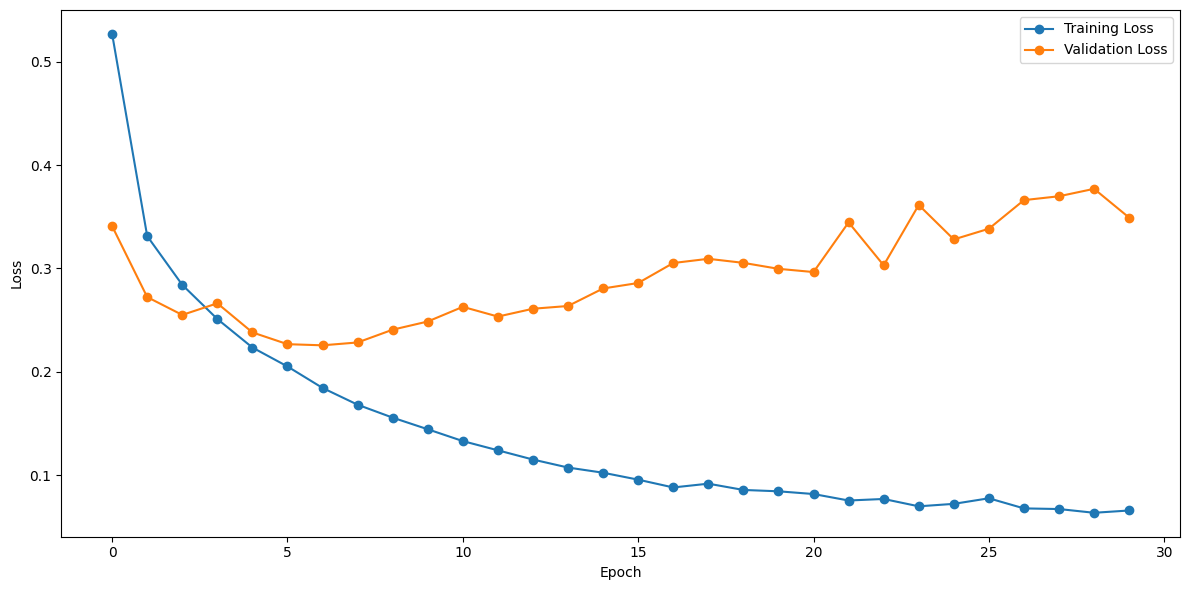

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


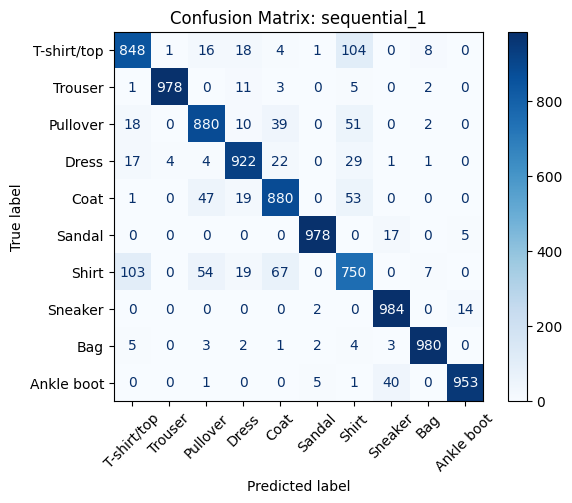

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9124 - loss: 0.3888
Test Accuracy: 91.53%


In [14]:
execute_model(model2)

In [15]:
# Modification#2: change filter size 3x3 -> 5x5
model3 = Sequential()
model3.add(Conv2D(32, (5, 5), activation='relu', input_shape=(data_size, data_size, 1)))
model3.add(MaxPooling2D((3, 3)))
model3.add(Conv2D(64, (5, 5), activation='relu'))
model3.add(MaxPooling2D((3, 3)))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(10, activation='softmax'))

model3.compile(
    optimizer='adam', # opt: adam/sgd
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6534 - loss: 0.9632 - val_accuracy: 0.8411 - val_loss: 0.4343
Epoch 2/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8334 - loss: 0.4644 - val_accuracy: 0.8609 - val_loss: 0.3808
Epoch 3/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8584 - loss: 0.3941 - val_accuracy: 0.8733 - val_loss: 0.3460
Epoch 4/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8704 - loss: 0.3511 - val_accuracy: 0.8787 - val_loss: 0.3301
Epoch 5/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8797 - loss: 0.3266 - val_accuracy: 0.8737 - val_loss: 0.3457
Epoch 6/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8885 - loss: 0.3003 - val_accuracy: 0.8863 - val_loss: 0.3133
Epoch 7/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8939 - loss: 0.2925 - val_accuracy: 0.8869 - val_loss: 0.3009
Epoch 8/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9016 - loss: 0.2734 -

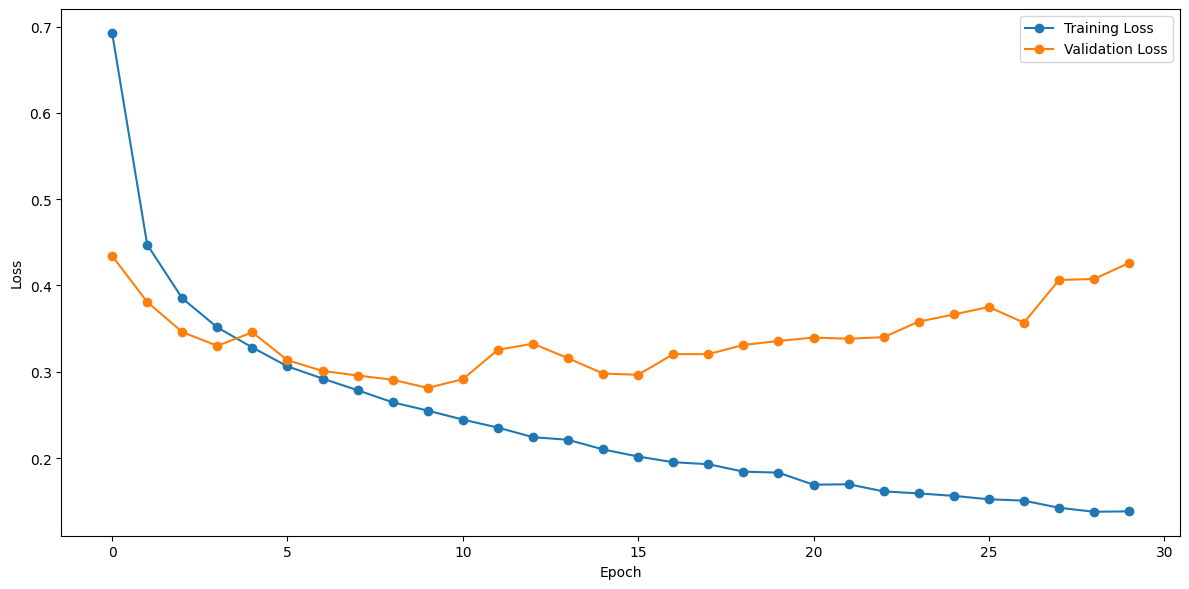

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


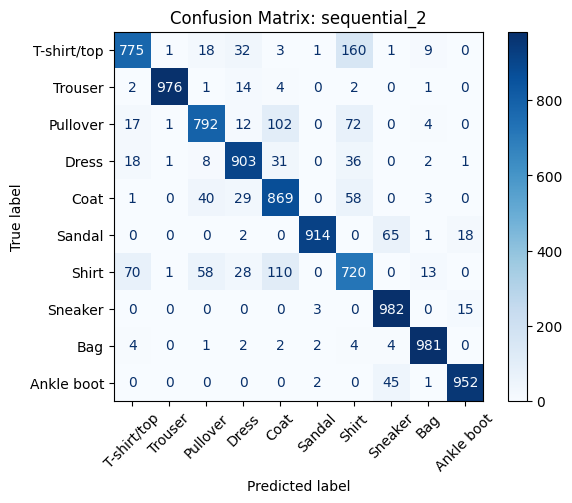

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8853 - loss: 0.4862
Test Accuracy: 88.64%


In [16]:
execute_model(model3)

In [18]:
# Modification#3: change optimizer
model4 = Sequential()
model4.add(Conv2D(32, (3, 3), activation='relu', input_shape=(data_size, data_size, 1)))
model4.add(MaxPooling2D((2, 2)))
model4.add(Conv2D(64, (3, 3), activation='relu'))
model4.add(MaxPooling2D((2, 2)))
model4.add(Flatten())
model4.add(Dense(128, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model4.compile(
    optimizer='sgd', # opt: adam/sgd
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Epoch 1/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4623 - loss: 1.5079 - val_accuracy: 0.7402 - val_loss: 0.6963
Epoch 2/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7166 - loss: 0.7480 - val_accuracy: 0.7837 - val_loss: 0.5782
Epoch 3/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7594 - loss: 0.6420 - val_accuracy: 0.7683 - val_loss: 0.5845
Epoch 4/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7800 - loss: 0.5930 - val_accuracy: 0.8085 - val_loss: 0.4911
Epoch 5/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7958 - loss: 0.5529 - val_accuracy: 0.8233 - val_loss: 0.4711
Epoch 6/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7998 - loss: 0.5360 - val_accuracy: 0.8281 - val_loss: 0.4543
Epoch 7/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8127 - loss: 0.5093 - val_accuracy: 0.8306 - val_loss: 0.4450
Epoch 8/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8234 - loss: 0.4882 

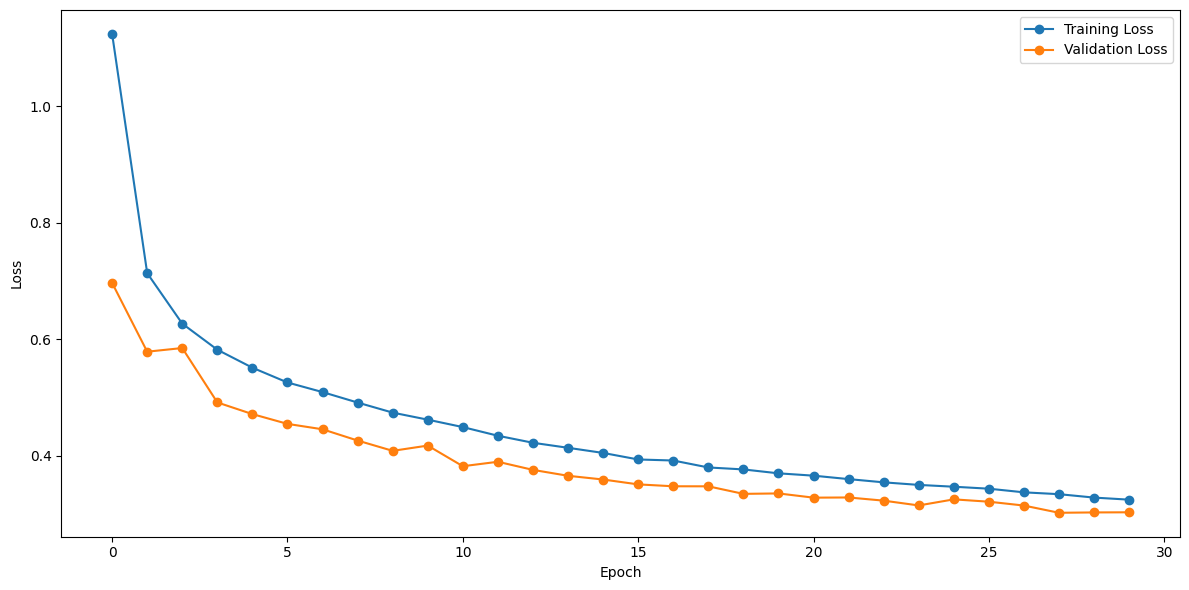

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


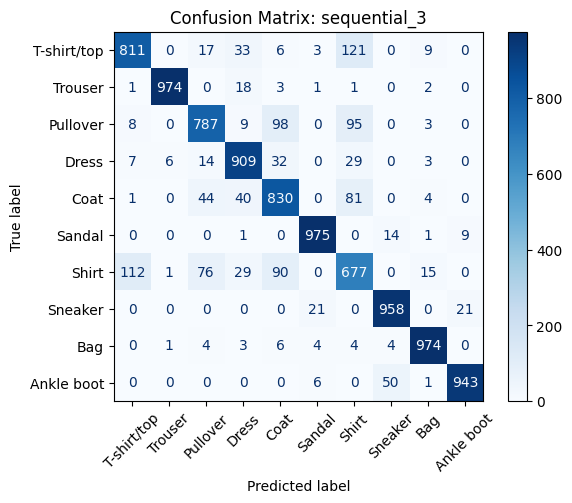

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8848 - loss: 0.3232
Test Accuracy: 88.38%


In [20]:
execute_model(model4)

In [21]:
# Comparison of models
model.name = 'Model_1'
model2.name = 'Model_2'
model3.name = 'Model_3'
model4.name = 'Model_4'

models = [model, model2, model3, model4]

for model in models:
    model.summary()
    score = model.predict(x_test)
    # Calculate accuracy by comparing predicted labels to true labels
    pred_labels = np.argmax(score, axis=1)  # Convert probabilities to class labels
    accuracy = np.mean(pred_labels == y_test)  # Calculate accuracy
    print(f"Test Accuracy for {model.name}: {accuracy * 100:.2f}%")
    print('\n')

Model: "Model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 675,104 (2.58 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 450,070 (1.72 MB)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Test Accuracy for Model_1: 91.21%




Model: "Model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,538,784 (13.50 MB)

 Trainable params: 1,179,594 (4.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,359,190 (9.00 MB)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test Accuracy for Model_2: 91.53%




Model: "Model_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 4, 4, 64)       │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 185,120 (723.13 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 123,414 (482.09 KB)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Test Accuracy for Model_3: 88.64%




Model: "Model_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,036 (879.05 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Test Accuracy for Model_4: 88.38%


